Churn data analasis
1. importing the data to a variable df

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv(r"data\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


doing some primary analysis .

In [43]:
df.shape

(1460, 81)

there are **1460 rows and 81 columns** in the csv file.

    1) there are columns with missing values [Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, Electrical, FireplaceQu GarageType GarageYrBlt GarageFinish GarageQual GarageCond PoolQC Fence MiscFeature]

    based on the metadata,
    1) [MSSubClass] columns are suposed to be catogorical, but are numeric.
    2) [YearBuilt] column should be data and time.
    3) OverallQual is numeric but should be odinal.
    4) [ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC, Fence] columns are string, but should be odinal.

    1) MasVnrType, FireplaceQu contain 50% missing values.
    2) based on domain knoledge the most important columns for house price prediction are ['OverallQual' ,'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF' ,'YearBuilt', 'FullBath', 'TotRmsAbvGrd' ,'GarageArea', 'Foundation', 'ExterCond' ,'ExterQual' , 'Neighborhood', 'KitchenQual' ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

    checking for duplicate values.

In [44]:
df['Id'].value_counts()

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64

    there are no duplicate values.

In [45]:
print(df['PoolQC'].isnull().sum() / 1460)
print(df['MiscFeature'].isnull().sum()/1460)
print(df['Alley'].isnull().sum()/1460)
print(df['Fence'].isnull().sum()/1460)

0.9952054794520548
0.963013698630137
0.9376712328767123
0.8075342465753425


**droping PoolQC, MiscFeature, Alley and Fence as they have more than 90% missing values.**

In [46]:
df.drop(columns=['PoolQC', 'MiscFeature', 'Alley' , 'Fence'],inplace=True)

In [47]:
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['Condition2'].value_counts())
print(df['RoofMatl'].value_counts())
print(df['Heating'].value_counts())

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64


**as there is a huge disparity of catogary in [Utilities, Street, Condition2, RoofMatl, Heating] we will simply delete them.**

In [48]:
df.drop(columns=['Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating'],inplace=True)

now lets slice the dataframe into the most important 20 columns. (based on domain knoledge)

In [49]:
df = df[['OverallQual' ,'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF' ,'YearBuilt', 'FullBath', 'TotRmsAbvGrd' ,'GarageArea', 'Foundation', 'ExterCond' ,'ExterQual' , 'Neighborhood', 'KitchenQual' ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'SalePrice','LotArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','PoolArea','SaleType','Functional']]

In [50]:
df.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,Foundation,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,PoolArea,SaleType,Functional
0,7,1710,2,856,856,2003,2,8,548,PConc,...,548,0,61,0,0,0,0,0,WD,Typ
1,6,1262,2,1262,1262,1976,2,6,460,CBlock,...,460,298,0,0,0,0,0,0,WD,Typ
2,7,1786,2,920,920,2001,2,6,608,PConc,...,608,0,42,0,0,0,0,0,WD,Typ
3,7,1717,3,756,961,1915,1,7,642,BrkTil,...,642,0,35,272,0,0,0,0,WD,Typ
4,8,2198,3,1145,1145,2000,2,9,836,PConc,...,836,192,84,0,0,0,0,0,WD,Typ


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageCars     1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   1stFlrSF       1460 non-null   int64 
 5   YearBuilt      1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   GarageArea     1460 non-null   int64 
 9   Foundation     1460 non-null   object
 10  ExterCond      1460 non-null   object
 11  ExterQual      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  KitchenQual    1460 non-null   object
 14  BsmtQual       1423 non-null   object
 15  BsmtCond       1423 non-null   object
 16  BsmtExposure   1422 non-null   object
 17  SalePrice      1460 non-null   int64 
 18  LotArea        1460 non-null

    [Foundation    Neighborhood]  [OverallQual]  [garage car, FullBath] , [BsmtQual, YearBuilt] are ordinal values

[garage car, FullBath] are ordinal, since they only have 5 unique values converting to catogory. (as only 5 unique values there)

In [52]:
df['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [53]:
df['GarageCars'] = df['GarageCars'].map({0:'0', 1:'1', 2:'2',3:'3',4:'4'})
df['FullBath'] = df['FullBath'].map({0:'0',  1:'1', 2:'2',3:'3',4:'4'})

df['BsmtQual'].replace({'Fa':'1','TA':'2','Gd':'3','Ex':'4'},inplace=True)
df['KitchenQual'].replace({'Fa':'1','TA':'2','Gd':'3','Ex':'4'},inplace=True)

df['BsmtCond'].replace({'Po':'1', 'Fa':'2','TA':'3','Gd':'4'},inplace=True)
df['BsmtExposure'].replace({'No':'1', 'Mn':'2','Av':'3','Gd':'4'},inplace=True)
df['ExterQual'].replace({'Fa':'1','TA':'2','Gd':'3','Ex':'4'},inplace=True)
df['ExterCond'].replace({'Po':'1', 'Fa':'2','TA':'3','Gd':'4','Ex':'5'},inplace=True)

YearBuilt is ordinal, keeping it as numeric value. (as 112 unique values there)

In [54]:
len(df['YearBuilt'].value_counts())

112

converting overallqual to string data type.

In [55]:
df['OverallQual'] = df['OverallQual'].astype(str)
df['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

check if bsmtqual is null because of not having a basement.

In [56]:
df_dummy = df[['BsmtQual','BsmtCond','BsmtExposure']]
df_dummy[df_dummy['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure
17,NaN,NaN,NaN
39,NaN,NaN,NaN
90,NaN,NaN,NaN
102,NaN,NaN,NaN
156,NaN,NaN,NaN
182,NaN,NaN,NaN
259,NaN,NaN,NaN
342,NaN,NaN,NaN
362,NaN,NaN,NaN
371,NaN,NaN,NaN


    as all the basement mesures are null simaltaniously, i take the judgement call that they dont have basements.
    thus replaceing them with NA. (as the data discription used Na for no basement)
    also there is one row with basementexposure as null while having a basement, we relace it with No exposure.

In [57]:
for i in df_dummy[df_dummy['BsmtQual'].isnull()].index:
    df['BsmtQual'].iloc[i] = '0' 
    df['BsmtCond'].iloc[i] = '0'
    df['BsmtExposure'].iloc[i] = '0'
df.loc[df['BsmtExposure'].isnull(), 'BsmtExposure'] = '0'

In [58]:
df.select_dtypes(['int','float'])[df['1stFlrSF'] > 4000]

,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,TotRmsAbvGrd,GarageArea,SalePrice,LotArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,PoolArea
1298,5642,6110,4692,2008,12,1418,160000,63887,1418,214,292,0,0,0,0,480


    here this data point is an unatural outlier, as all the numeric columns show that it is exeptionaly costly but the sale price in low.
    my judjement call is to delete this row.

In [59]:
df = df[df['1stFlrSF'] < 4000]

    combining similar values into one column.

In [60]:
df['Total_Interior_Area'] = df[['GrLivArea', 'TotalBsmtSF']].sum(axis=1)
df['Total_Exterior_Area'] = df[['GarageArea', 'LotArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']].sum(axis=1)

spliting the df into odinals and non ordinals.

In [61]:
df_nonodinal = df[['Total_Interior_Area','Total_Exterior_Area','Foundation','Neighborhood','MiscVal','SaleType','SalePrice']]
df_ordinal = df[['OverallQual','BsmtQual','YearBuilt','KitchenQual','BsmtCond','BsmtExposure','ExterQual','ExterCond','TotRmsAbvGrd']] 

    Standerdising the numeric data.
    We are trying to predict price, we need to keep the outlier data preserved, so we using standerdisation.

In [62]:
df_dummy = df_nonodinal.select_dtypes(['int','float'])

column_means = df_dummy.mean()
column_std = df_dummy.std()

# Standardize the columns
df_nonodinal[df_nonodinal.select_dtypes(['int','float']).columns] = (df_dummy - column_means) / column_std
df_nonodinal

,Total_Interior_Area,Total_Exterior_Area,Foundation,Neighborhood,MiscVal,SaleType,SalePrice
0,-0.000764,-0.191199,PConc,CollgCr,-0.087688,WD,0.346863
1,-0.054063,-0.099674,CBlock,Veenker,-0.087688,WD,0.007103
2,0.176900,0.099616,PConc,CollgCr,-0.087688,WD,0.535619
3,-0.118783,-0.037421,BrkTil,Crawfor,-0.087688,WD,-0.515121
4,0.985271,0.451282,PConc,NoRidge,-0.087688,WD,0.869087
...,...,...,...,...,...,...,...
1455,0.042383,-0.264380,PConc,Gilbert,-0.087688,WD,-0.074691
1456,1.330447,0.266727,CBlock,NWAmes,-0.087688,WD,0.365739
1457,1.174356,-0.191300,Stone,Crawfor,4.949671,WD,1.076718
1458,-0.521065,-0.120826,CBlock,NAmes,-0.087688,WD,-0.488380


reducing the number of catogary in columns. as having manycatogary affect statistical analysis and model.

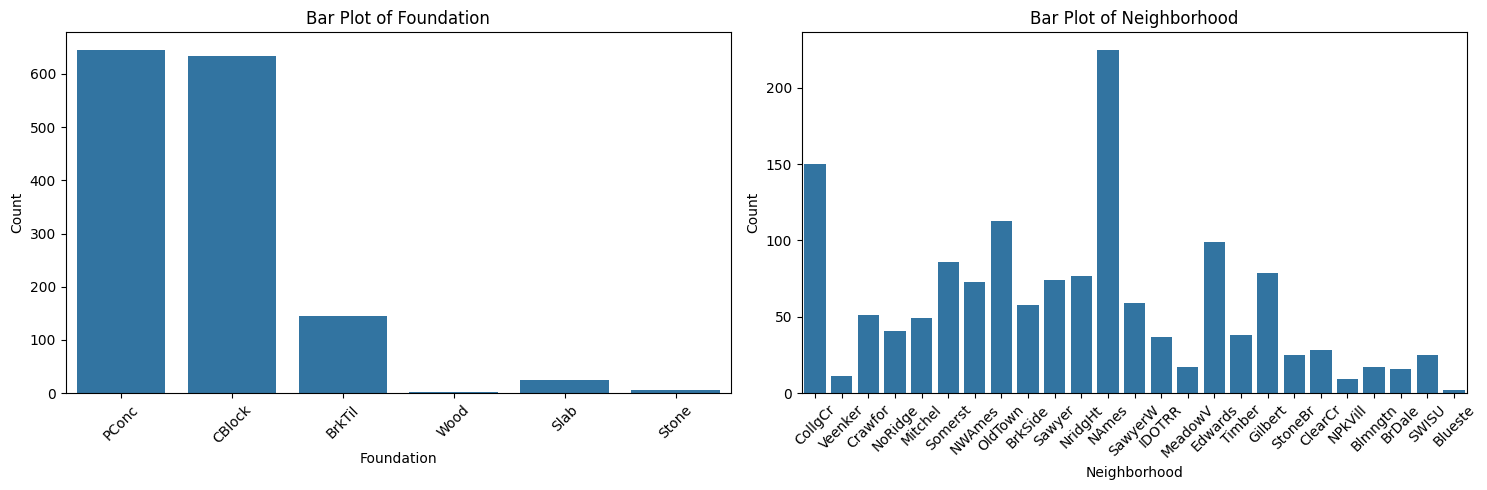

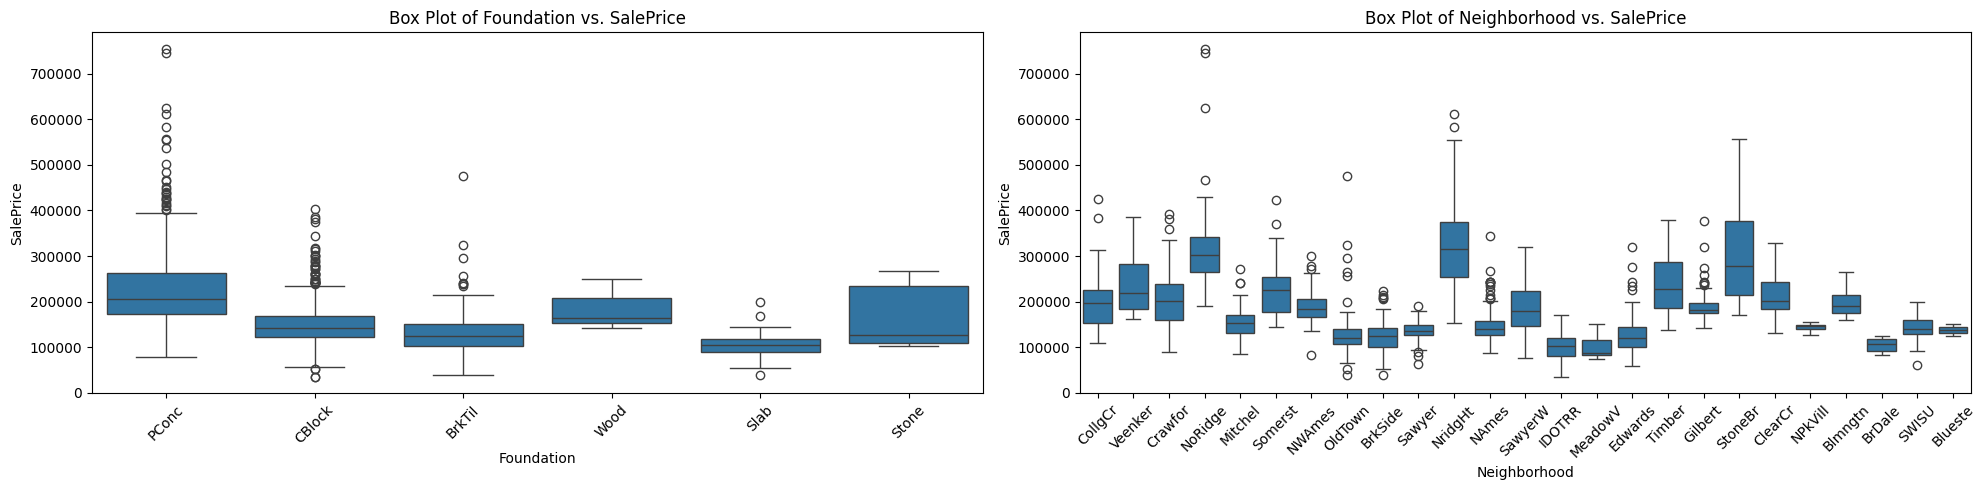

In [63]:
dummy_df = df_nonodinal[['Foundation','Neighborhood']]

fig, axes = plt.subplots(1, len(dummy_df.columns), figsize=(15, 5))

for i, column in enumerate(dummy_df.columns):
    sns.countplot(x=column, data=dummy_df, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Loop through each categorical column and create box plots
for i, column in enumerate(['Foundation', 'Neighborhood']):
    sns.boxplot(x=column, y='SalePrice', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} vs. SalePrice')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    # axes[i].set_yscale('log')  # Set y-axis scale to logarithmic

plt.tight_layout()
plt.show()

combining wood slab and stone to rare catogary in Foundation column. as the frequency of them is low.

In [64]:
df_nonodinal['Foundation'].replace({'Wood': 'Rare','Slab':'Rare','Stone':'Rare'},inplace= True)

In [65]:
df_nonodinal['SaleType'].value_counts()

SaleType
WD       1267
New       121
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

combining rare catogory of sale type.

In [66]:
df_nonodinal['SaleType'].replace({'COD': 'Rare','ConLD':'Rare','ConLI':'Rare','ConLw': 'Rare','CWD':'Rare','Oth':'Rare','Con':'Rare'},inplace= True)

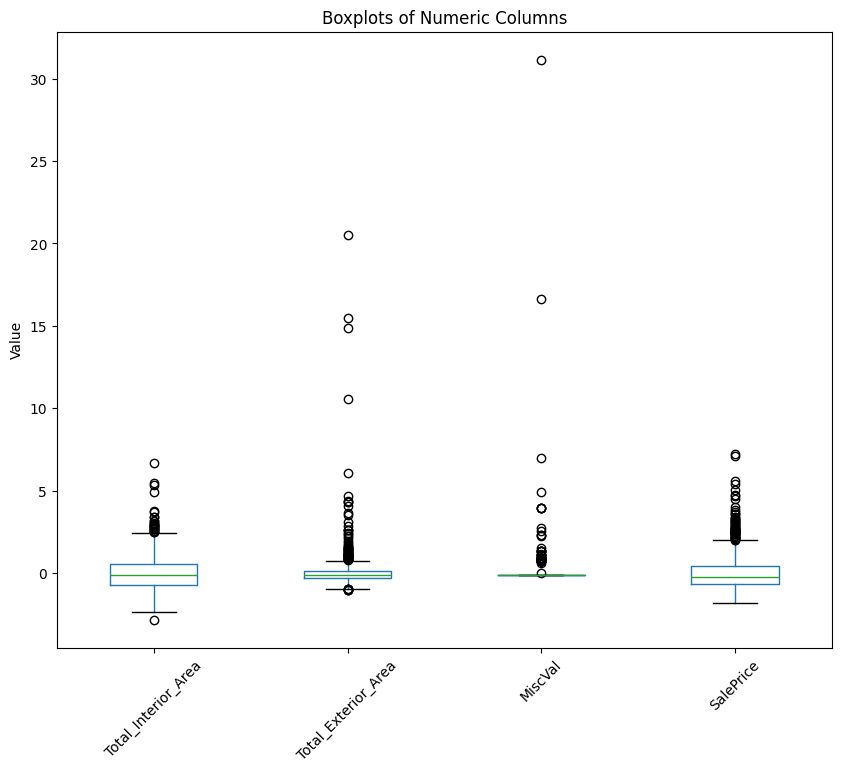

In [67]:
plt.figure(figsize=(10, 8))
df_nonodinal.boxplot(grid=False)
plt.title('Boxplots of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()

**there are outliers, but these are natural outliers. so we keep them.**

**EDA**

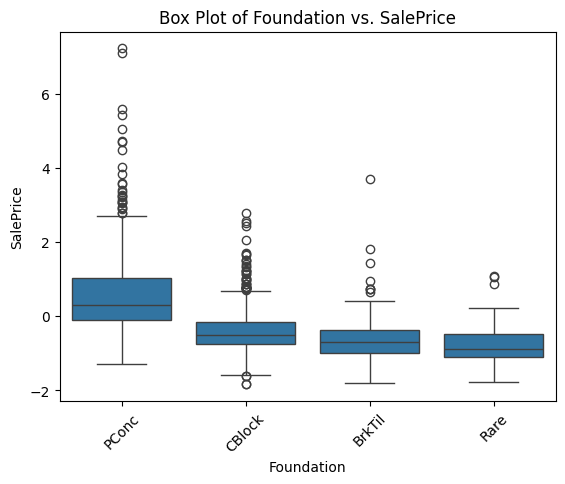

In [68]:
neighborhood_counts = df['Neighborhood'].value_counts().sort_values()

# Sort the neighborhoods based on their counts in ascending order
sorted_neighborhoods = neighborhood_counts.index.tolist()


sns.boxplot(x='Foundation', y='SalePrice', data=df_nonodinal)
plt.title(f'Box Plot of Foundation vs. SalePrice')
plt.xlabel('Foundation')
plt.ylabel('SalePrice')
plt.tick_params(axis='x', rotation=45)

plt.show()

the median for PConc is higher than the rest of the catogary in Foundation column.

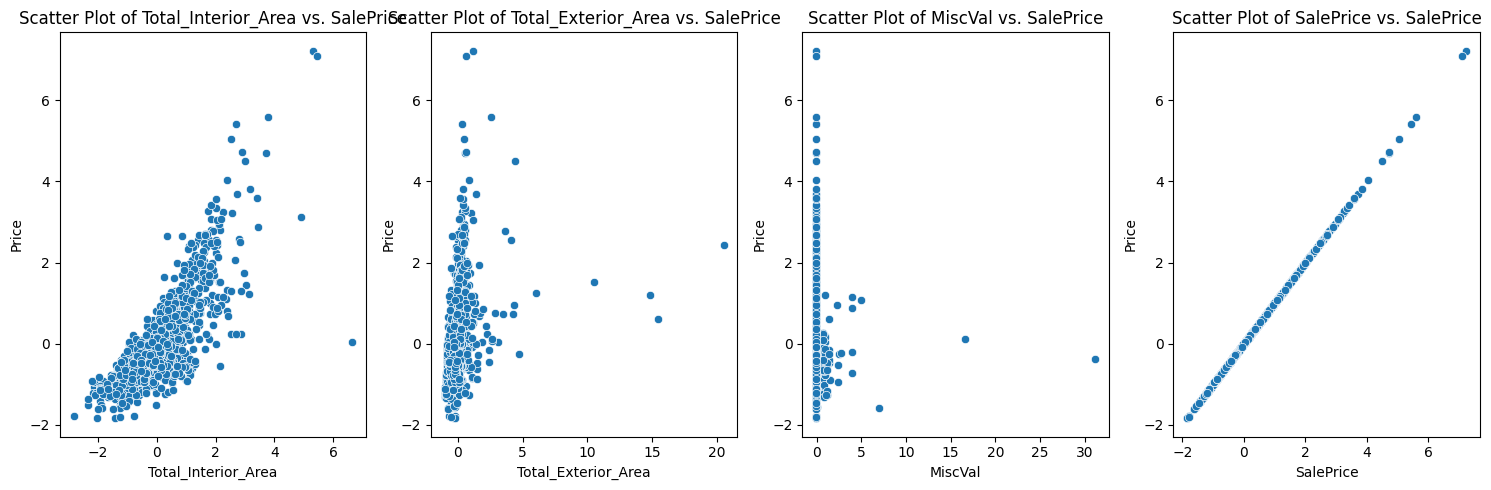

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_nonodinal.select_dtypes(include=['int', 'float']).columns), figsize=(15, 5))

# Loop through each numeric column and create scatter plots
for i, column in enumerate(df_nonodinal.select_dtypes(include=['int', 'float']).columns):
    sns.scatterplot(x=column, y='SalePrice', data=df_nonodinal, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {column} vs. SalePrice')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

    there is high corelation between price and all the numeric columns.

as miscVal dont have a good correlation with price we simply drop it.

In [70]:
df_nonodinal.drop(columns='MiscVal',inplace=True)

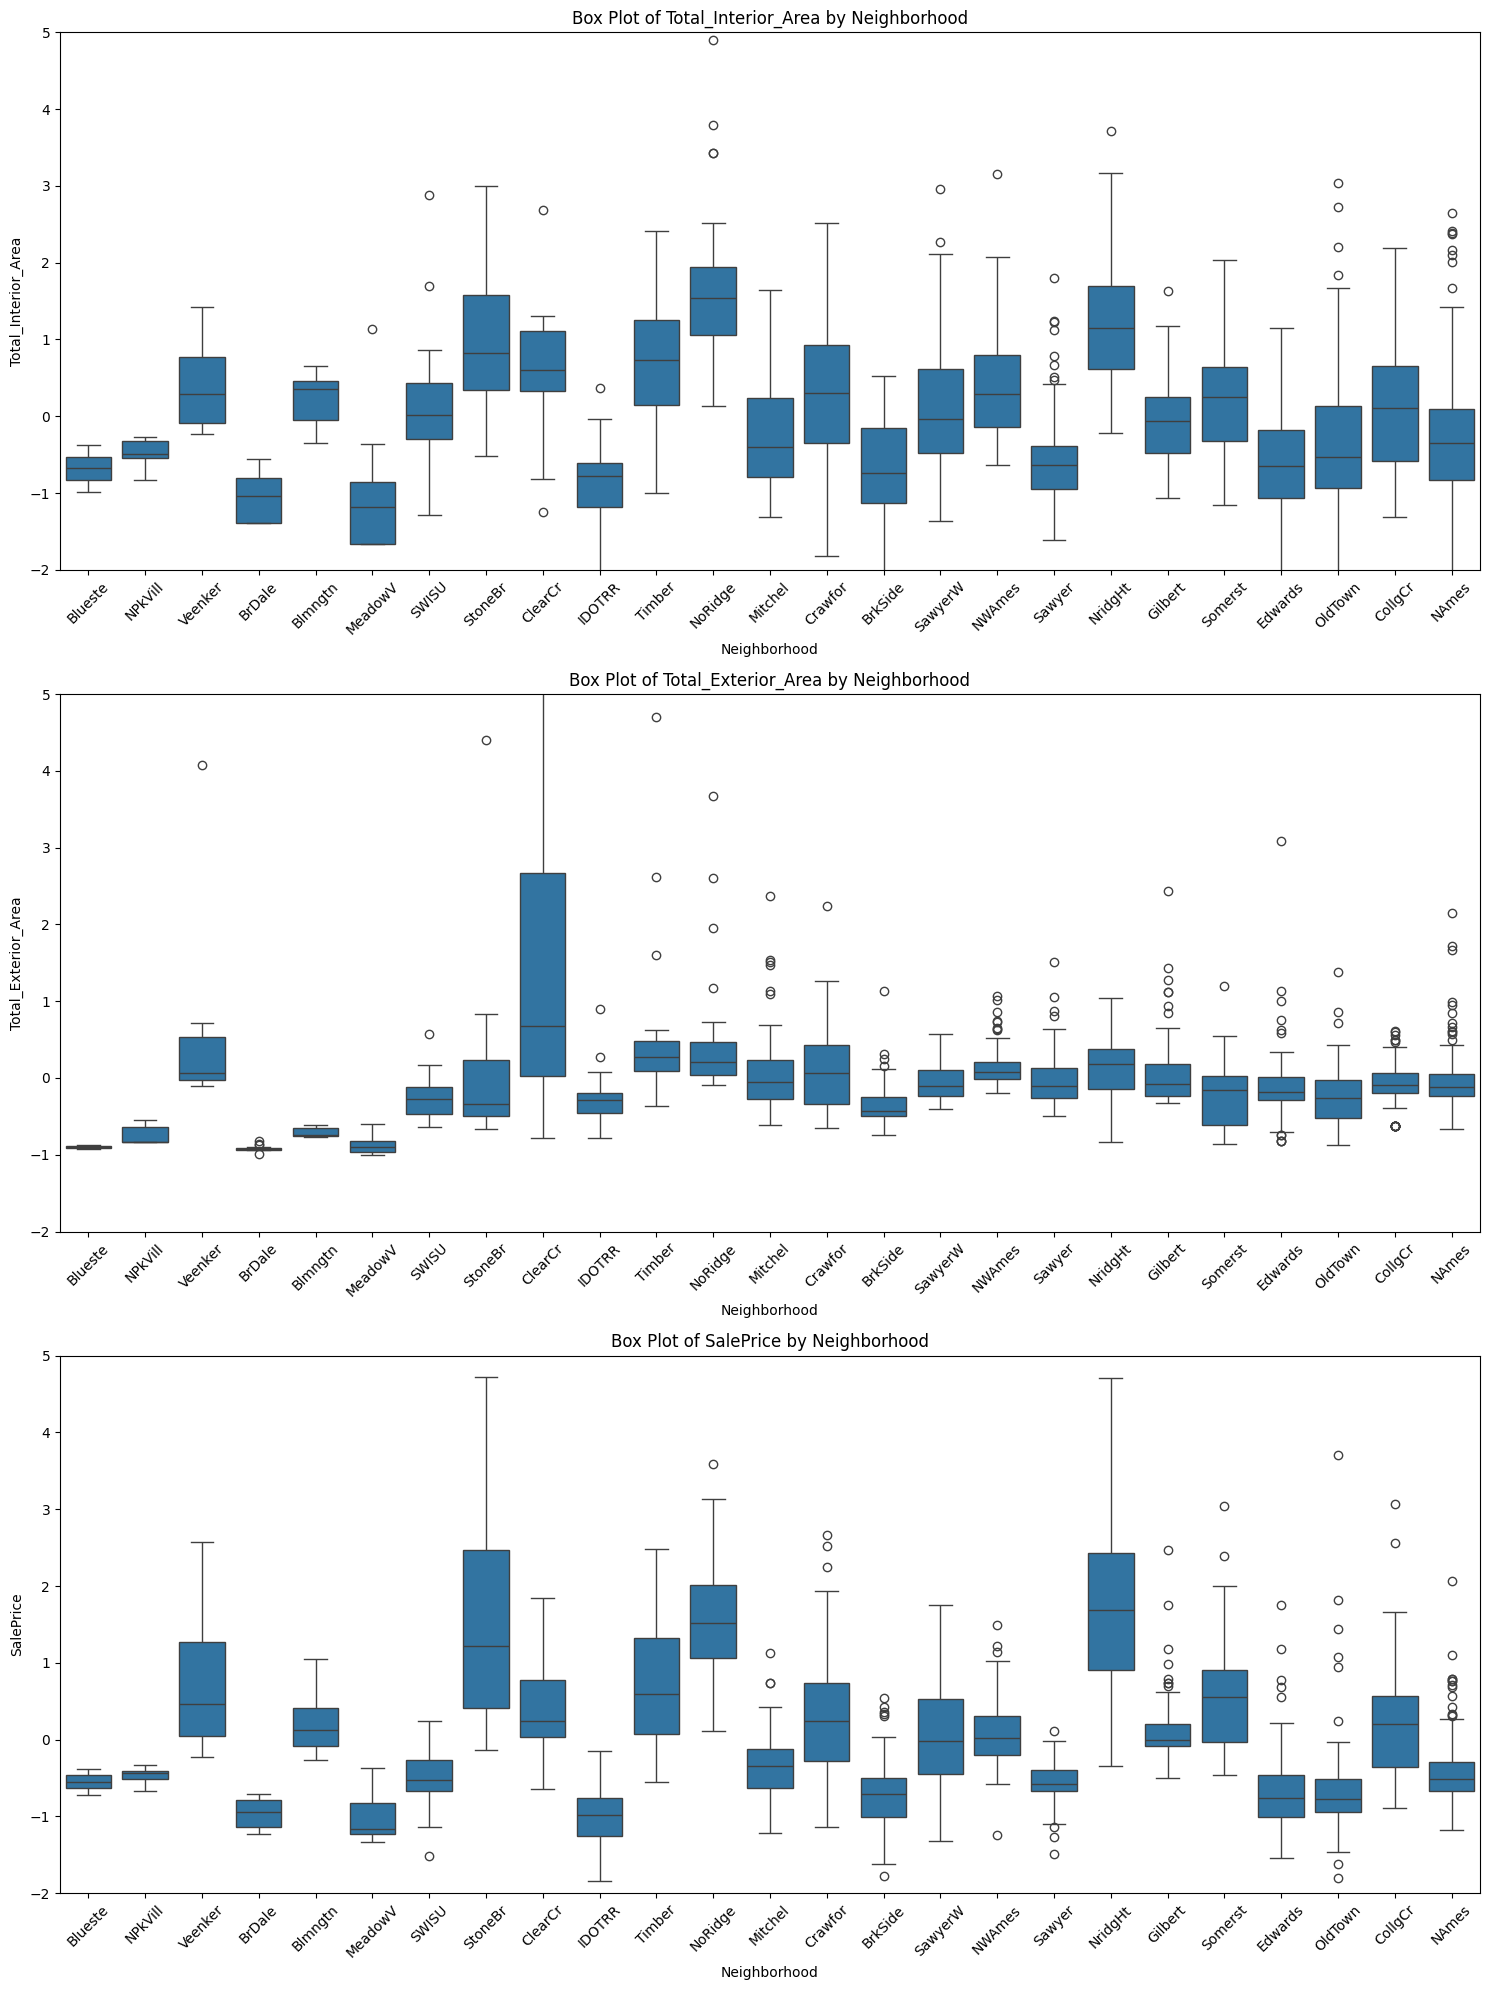

In [71]:
neighborhood_counts = df_nonodinal['Neighborhood'].value_counts().sort_values()
sorted_neighborhoods = neighborhood_counts.index.tolist()
fig, axes = plt.subplots(ncols=1, nrows=len(df_nonodinal.select_dtypes(['int','float']).columns), figsize=(15, 20))

# Loop through each numeric column and create box plots
for i, column in enumerate(df_nonodinal.select_dtypes(['int','float']).columns):
    sns.boxplot(x='Neighborhood', y=column, data=df_nonodinal, order=sorted_neighborhoods, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} by Neighborhood')
    axes[i].set_xlabel('Neighborhood')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[i].set_ylim(-2, 5)

plt.tight_layout()
plt.show()

    there is no consistent patern in neigborhood catogory so we drop it.

In [72]:
df_nonodinal.drop(columns='Neighborhood',inplace=True)

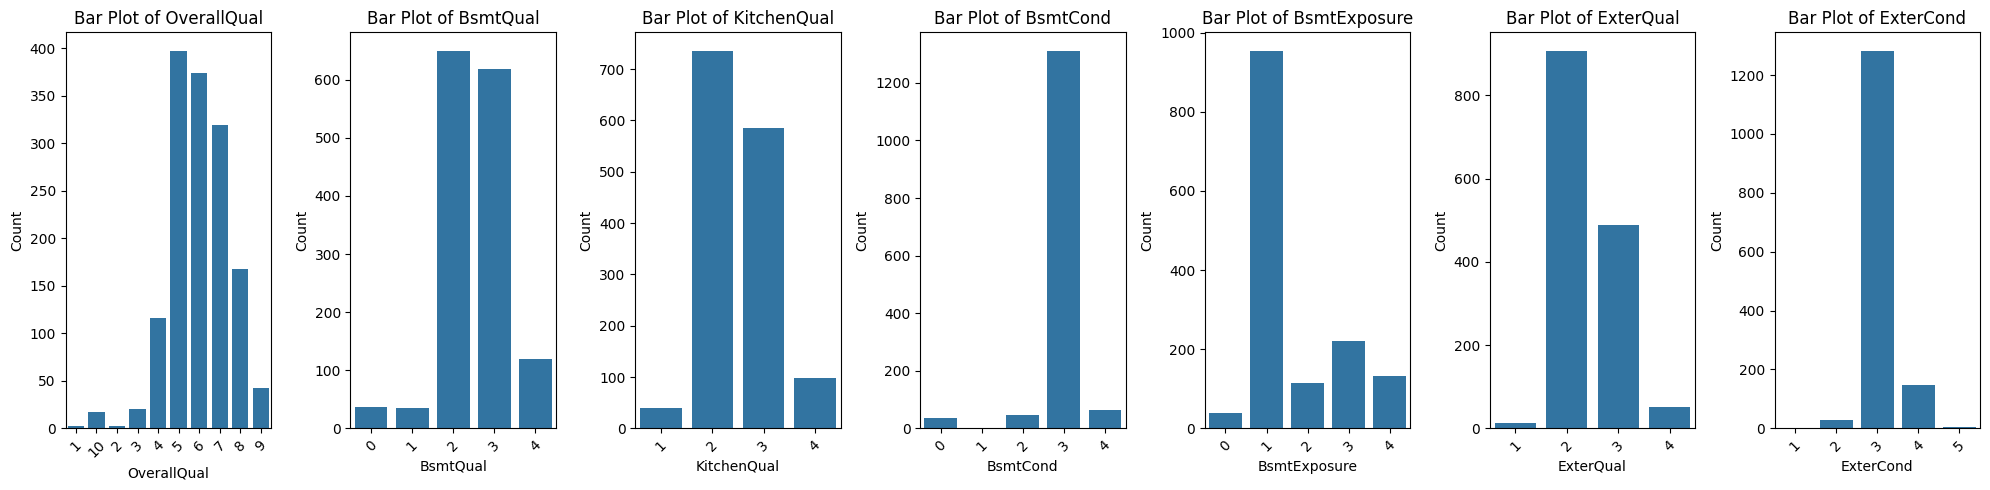

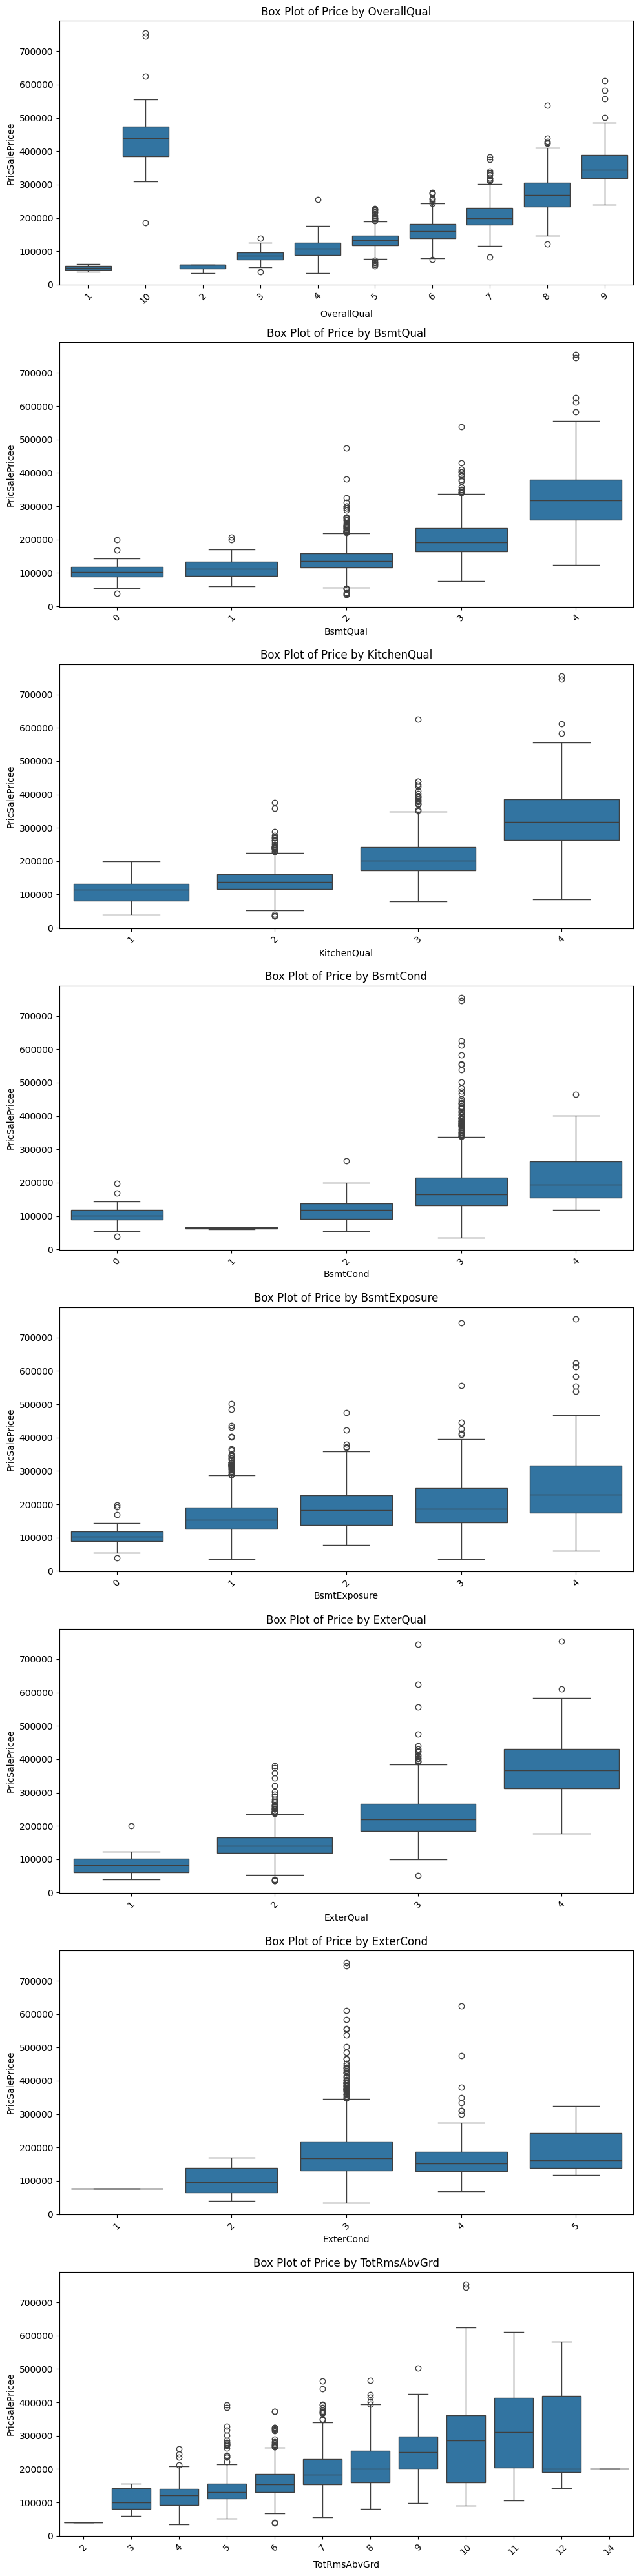

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_ordinal.select_dtypes(include=['object']).columns), figsize=(20, 5))

# Loop through each categorical column
for i, column in enumerate(df_ordinal.select_dtypes(include=['object']).columns):
    # Sort the unique category values alphabetically
    categories = df_ordinal[column].unique()
    categories.sort()
    
    # Create bar plot with sorted categories
    sns.countplot(x=column, data=df_ordinal, order=categories, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=len(df_ordinal.drop(columns='YearBuilt').columns), ncols=1, figsize=(10, 5*len(df_ordinal.drop(columns='YearBuilt').columns)))

# Loop through each categorical column
for i, column in enumerate(df_ordinal.drop(columns='YearBuilt').columns):
    df_sorted = df.sort_values(by=column)
    sns.boxplot(x=column, y='SalePrice', data=df_sorted, ax=axes[i])
    axes[i].set_title(f'Box Plot of Price by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('PricSalePricee')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

    there is a clear increase in mean price for the columns Overalqual, kitchenqual, basementqual, exterqual.
    there is an average relation of mean  price for columns garagecar, fullbath and TotRmsAbvGrd.
    there is relatively low relation of mean  price for columns extercond, Bstexposure, BstCond so we will drop these columns.

In [74]:
df_ordinal.drop(columns=['ExterCond', 'BsmtExposure', 'BsmtCond','TotRmsAbvGrd'],inplace=True)

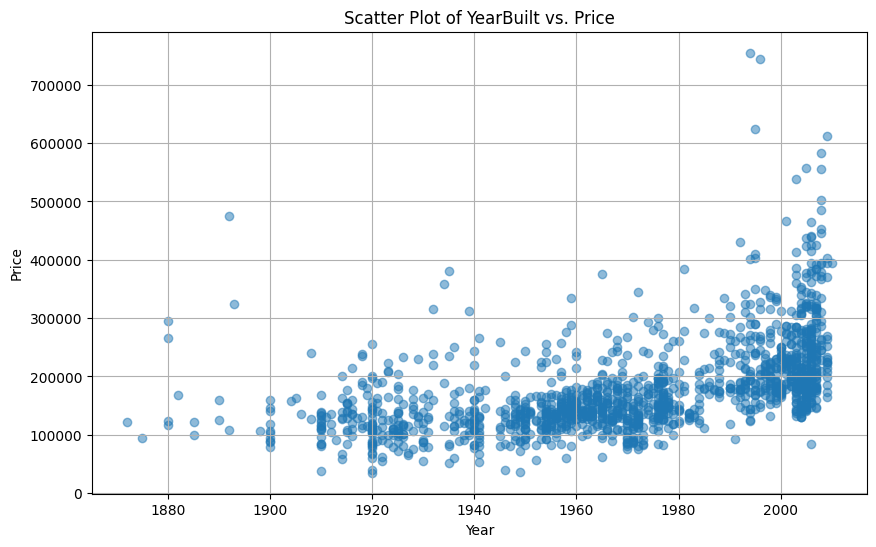

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearBuilt'], df['SalePrice'], alpha=0.5)
plt.title('Scatter Plot of YearBuilt vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

there is no relation between year biuld and price.

In [76]:
df_ordinal.drop(columns='YearBuilt',inplace=True)

In [77]:
df_nonodinal['SaleType'].value_counts()

SaleType
WD      1267
New      121
Rare      71
Name: count, dtype: int64

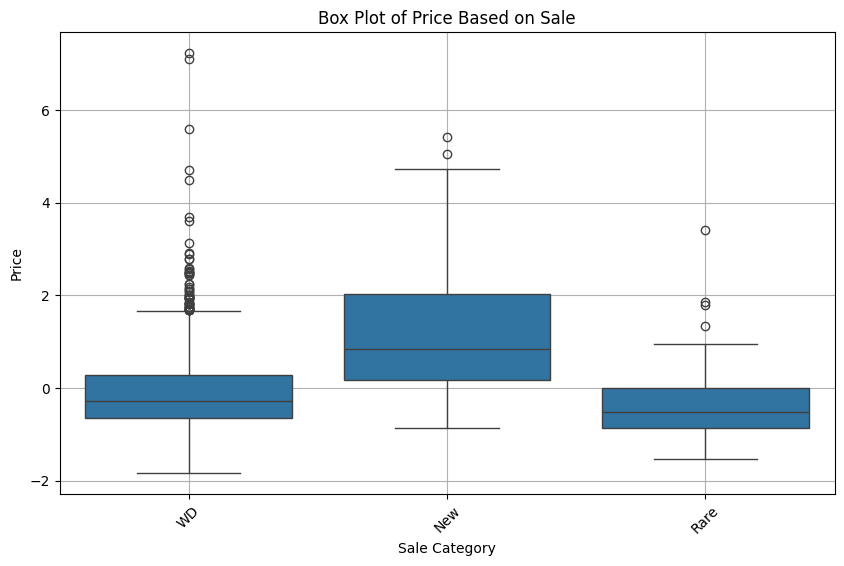

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleType', y='SalePrice', data=df_nonodinal)
plt.title('Box Plot of Price Based on Sale')
plt.xlabel('Sale Category')
plt.ylabel('Price')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

    it is visiable that new houses have a higher prise than .
    as we are only using this column to checking weather the house is new or not,
    we further agrecate the catogory.

In [79]:
df_nonodinal['SaleType'].replace({'WD':'Not_New','Rare':'Not_New'},inplace= True)

corelation heat map.

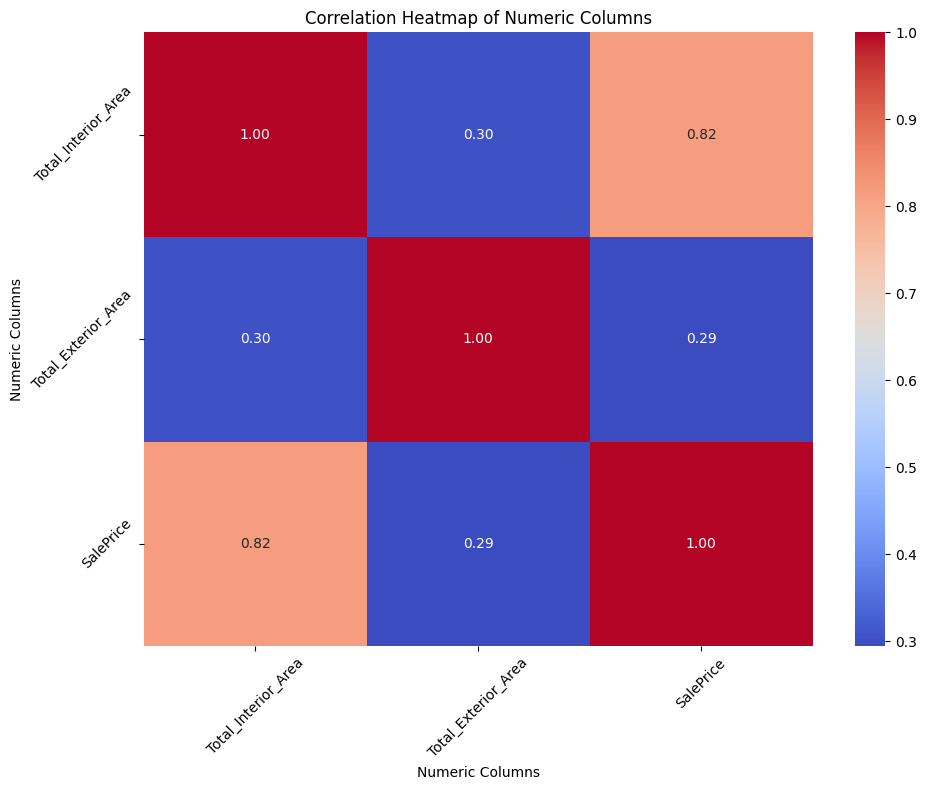

In [80]:
correlation_matrix = df_nonodinal[df_nonodinal.select_dtypes(['int','float']).columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Numeric Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

there is a high corelation between price and total interior area.

**Feature selection**

    intresting columns to consider based on EDA: 
    ['Total_Interior_Area', 'Total_Exterior_Area', 'MiscVal', 'SalePrice',
       'Foundation', 'Neighborhood', 'SaleType', 'OverallQual', 'BsmtQual',
       'KitchenQual', 'ExterQual']

In [81]:
df_new = pd.concat([df_nonodinal.select_dtypes(['int','float']),df_nonodinal.select_dtypes(['object']), df_ordinal], axis=1)
df_new.reset_index(drop=True, inplace=True)
df_new.columns

Index(['Total_Interior_Area', 'Total_Exterior_Area', 'SalePrice', 'Foundation',
       'SaleType', 'OverallQual', 'BsmtQual', 'KitchenQual', 'ExterQual'],
      dtype='object')

In [82]:
df_new.to_csv('house_new.csv')